<a href="https://colab.research.google.com/github/Afigodoga/AfiRep/blob/main/RLogisticReg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stat
import seaborn as sns
from sklearn.model_selection import train_test_split
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)


In [3]:
df=pd.read_csv("Loan_default.csv")

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [6]:
df.shape

(255347, 18)

There are 255347 rows and 18 columns

In [7]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


The maximum income is 149999.0 dollars and average is 82499.30 dollars and the minimum is $15000.0. The Maximum loan amount is $249999.0, the average was 127578.86 and the minimum is $5000.0
There has been an observation that the maximum Loan amount exceeds the maximum income.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

There is 4 float64,8 int64 and 8 objects in the dataset

In [9]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

There are no missing or null values in the dataset

In [10]:
df.duplicated().sum()

0

No duplicate has been detected

In [11]:
df.dropna(axis=0, how='any', inplace=True)
# handel duplicates
df.drop_duplicates()
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [12]:
df['LoanTerm']=df['LoanTerm']/12

In [13]:
cat_col = [
    "HasDependents",
    "HasMortgage",
    "MaritalStatus",
    "Education",
    "EmploymentType",
    "LoanPurpose",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64
----------------------------------------
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64
----------------------------------------
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64
----------------------------------------
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
----------------------------------------
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
----------------------------------------
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
----------------------------------------


In [14]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<ipython-input-14-a573fe092e3f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


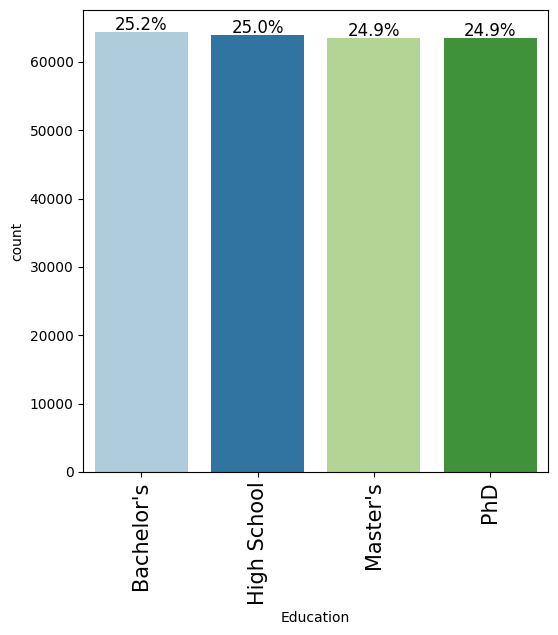

In [15]:
labeled_barplot(df,"Education",perc=True)

<ipython-input-14-a573fe092e3f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


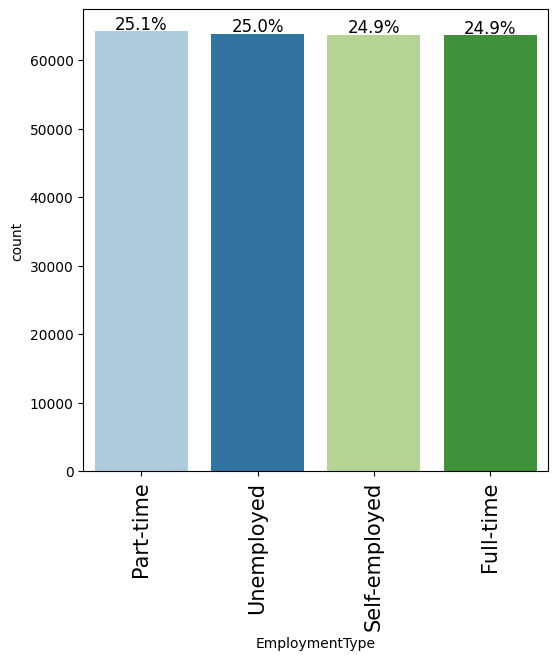

In [16]:
labeled_barplot(df,"EmploymentType", perc=True)

<ipython-input-14-a573fe092e3f>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


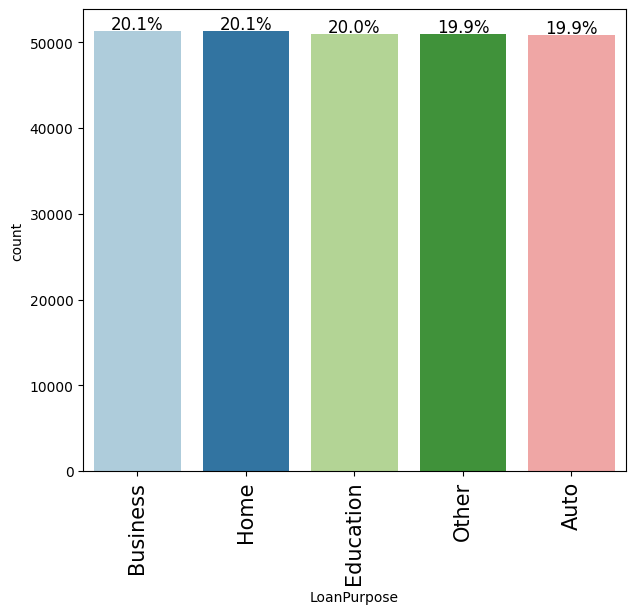

In [17]:
labeled_barplot(df,"LoanPurpose", perc=True)

In [18]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [19]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Default              0      1     All
EmploymentType                       
All             225694  29653  255347
Unemployed       55174   8650   63824
Part-time        56484   7677   64161
Self-employed    56404   7302   63706
Full-time        57632   6024   63656
------------------------------------------------------------------------------------------------------------------------


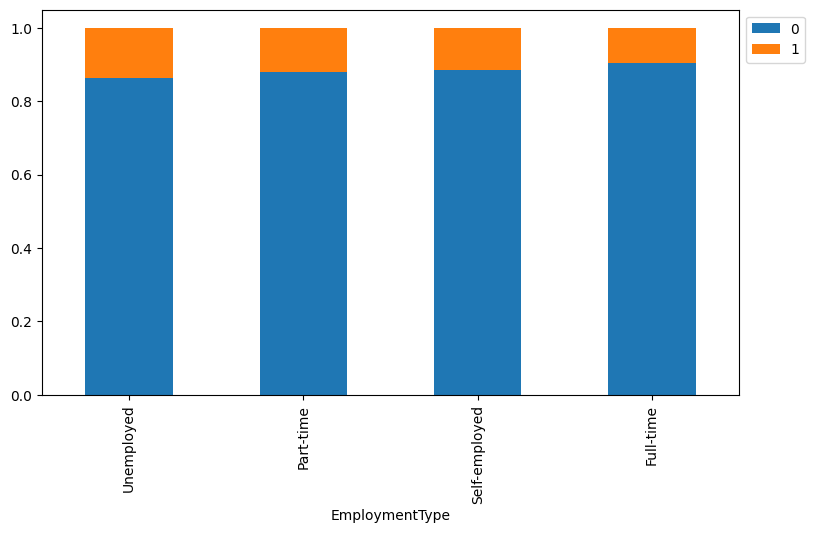

In [20]:
stacked_barplot(df, "EmploymentType", "Default")

From the stacked barplot above we raelised that the highest number of defaulters are the unemployed and the least are those who have full-time employment.

<ipython-input-18-d405489ef7b9>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-18-d405489ef7b9>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


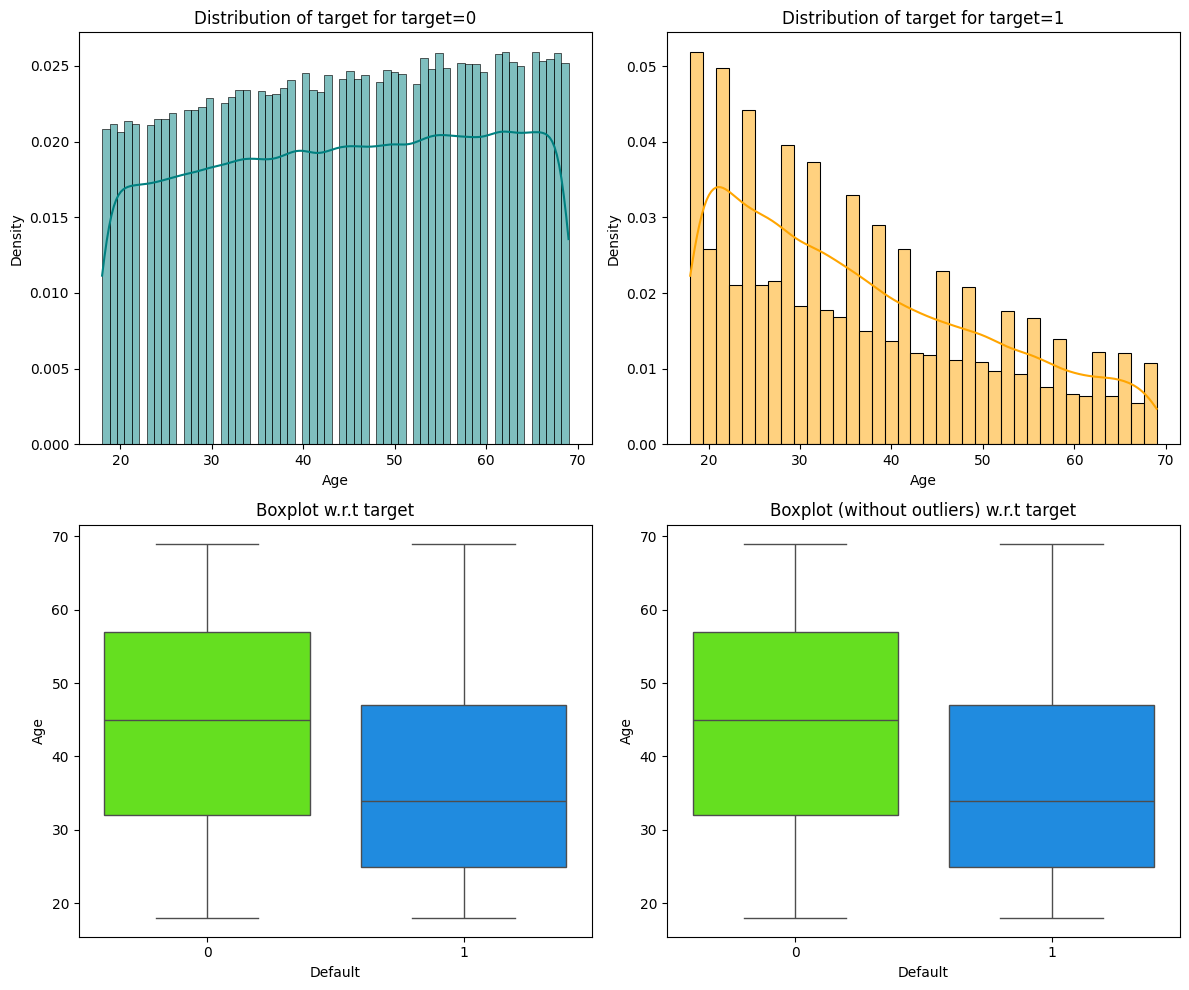

In [21]:
distribution_plot_wrt_target(df, "Age", "Default")

From the distribution above we realised that between the ages of 20 and 30 has higher chances of defaulting unlike the older folks.

PREPROCESSING

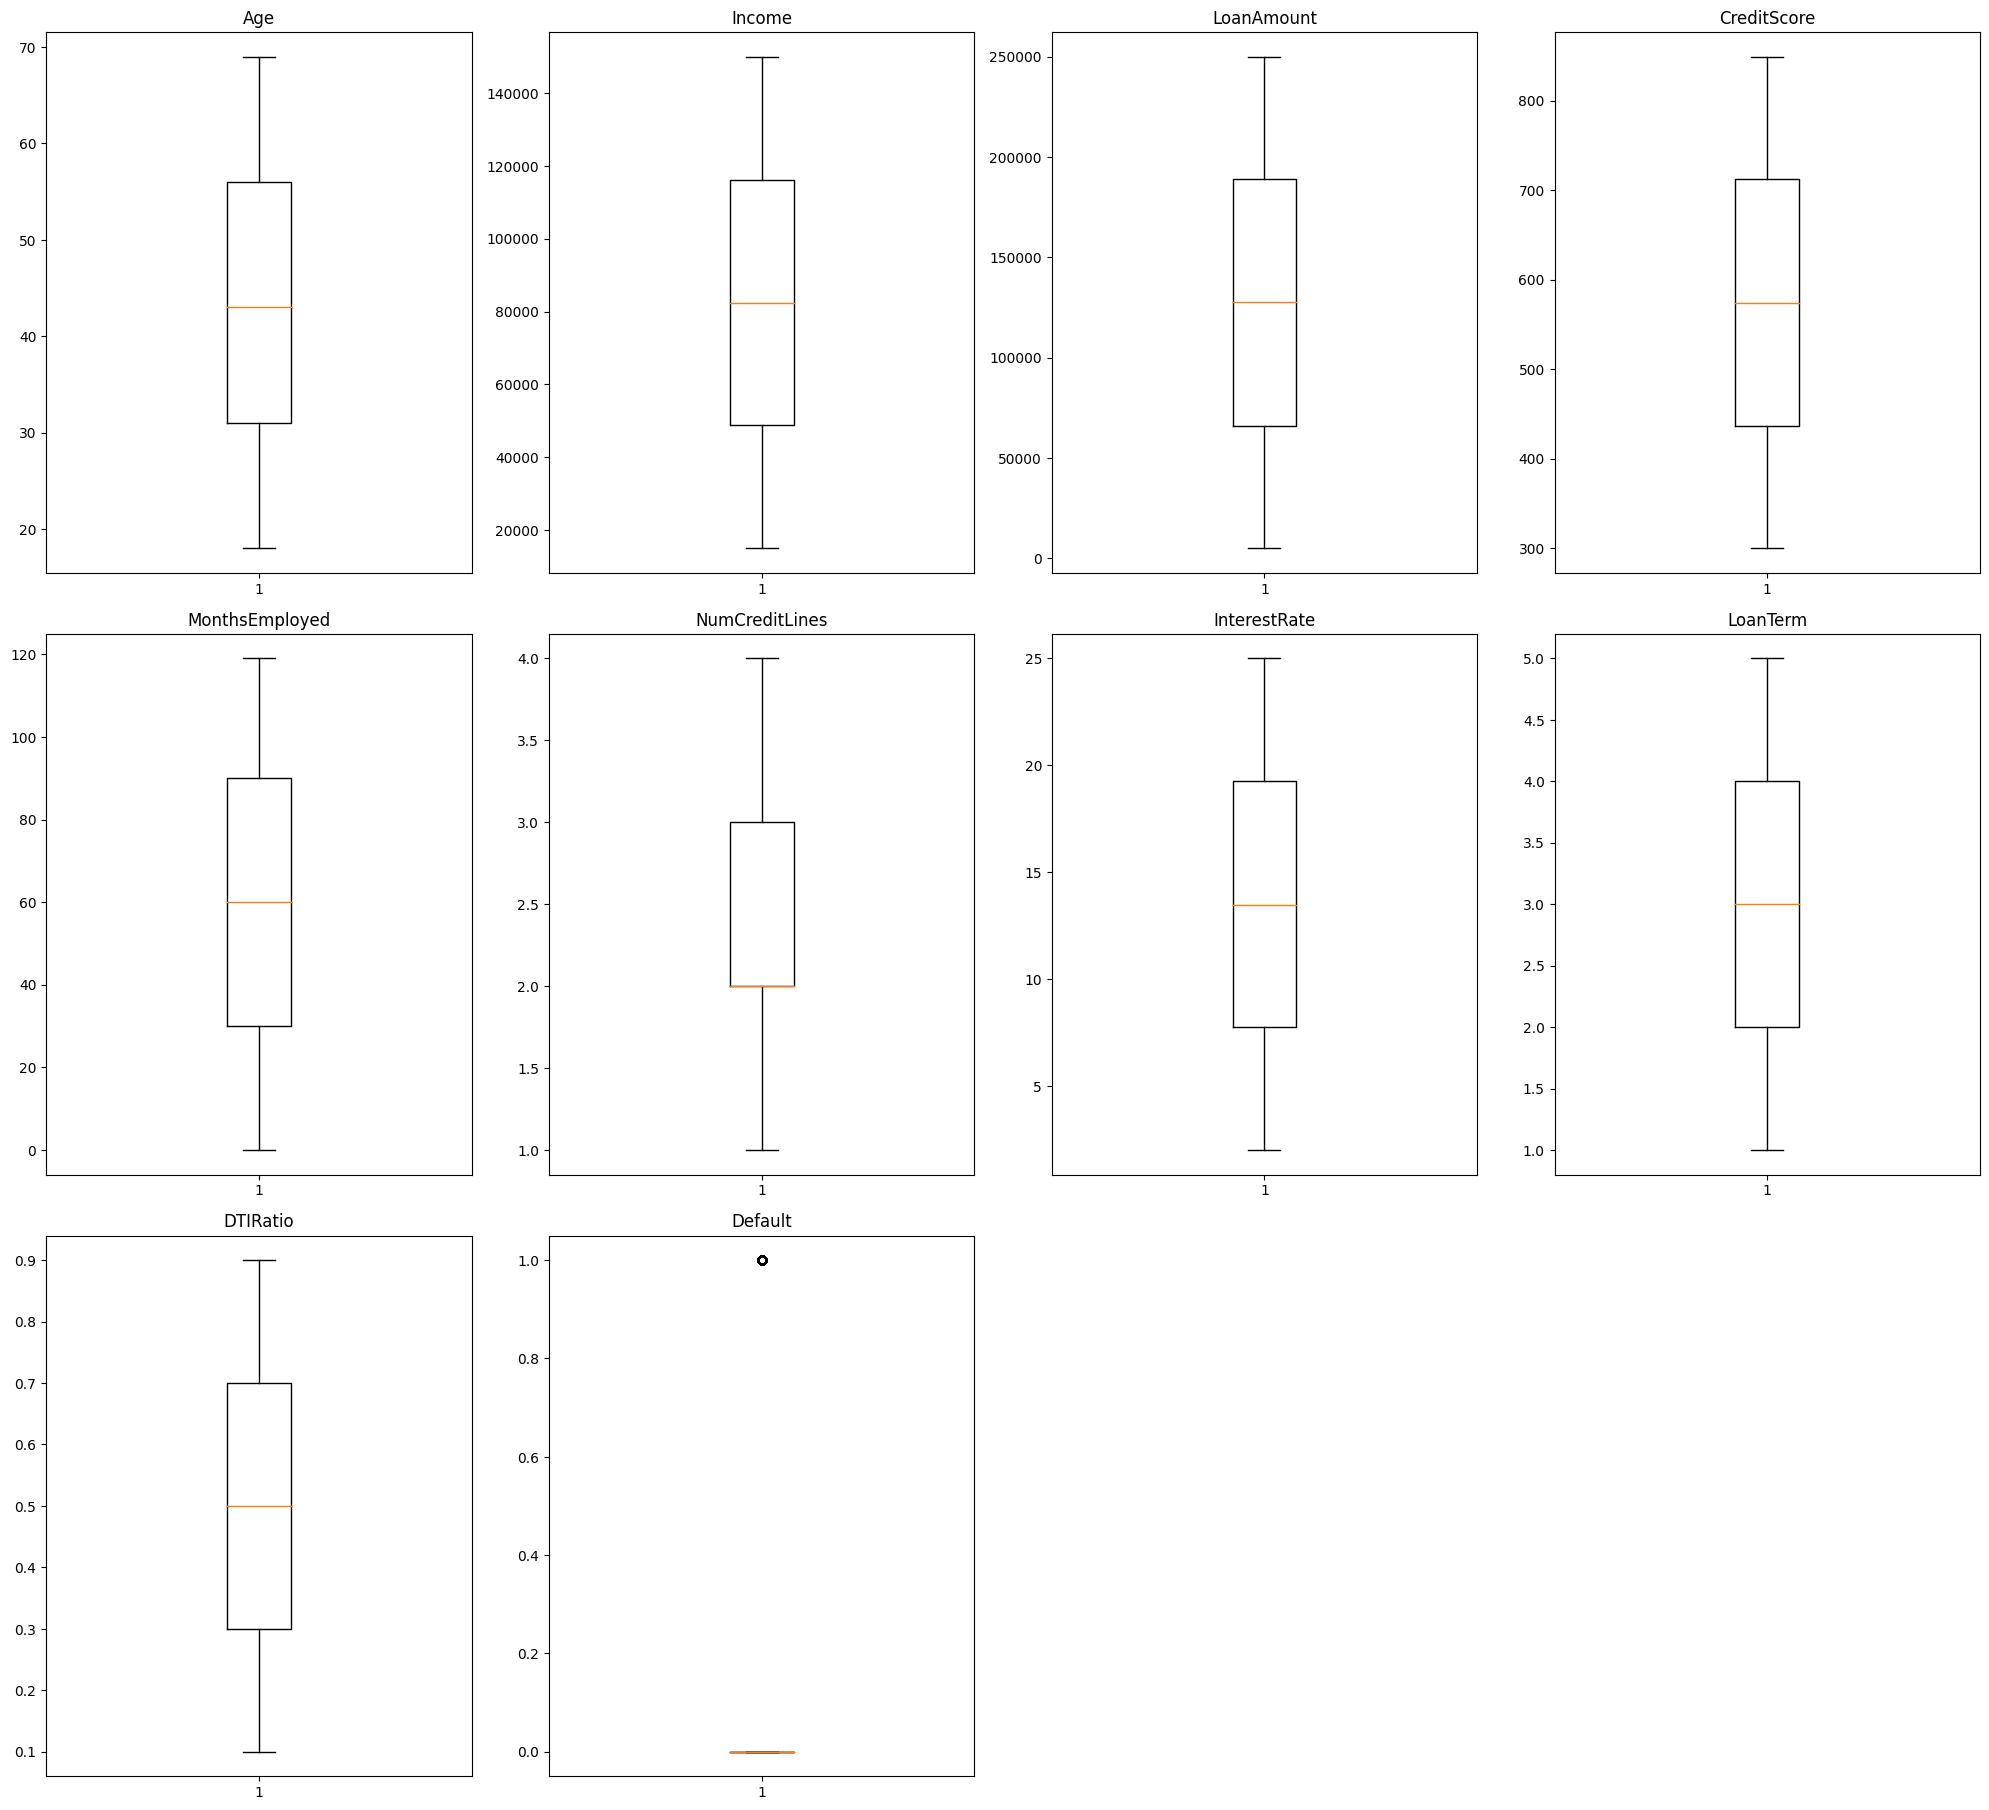

In [22]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

There are no outliers

In [23]:
# Converting monthly values to yearly
df["LoanTerm"] = df["LoanTerm"] / 12

In [24]:
# split into X and Y
X = df.drop('Default', axis=1)
X = X.drop ('LoanID', axis=1)# Features
y = df['Default'] # labels

In [25]:
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

In [26]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (178742, 25)
Shape of test set :  (76605, 25)
Percentage of classes in training set:
Default
0    0.883469
1    0.116531
Name: proportion, dtype: float64
Percentage of classes in test set:
Default
0    0.884812
1    0.115188
Name: proportion, dtype: float64


In [27]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [28]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [29]:
X_train = X_train.astype(float)
y_train = y_train.astype(int)

In [31]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(
    disp=False
)  # setting disp=False will remove the information on number of iterations

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               178742
Model:                          Logit   Df Residuals:                   178717
Method:                           MLE   Df Model:                           24
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                  0.1202
Time:                        10:20:38   Log-Likelihood:                -56607.
converged:                       True   LL-Null:                       -64339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.4640      0.063     -7.372      0.000      -0.587      -0.341
Age                             -0.0390      0.001    -70.678      0.000     

In [34]:
X_train

,const,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
177484,1.0,26.0,112699.0,106727.0,669.0,94.0,2.0,11.99,0.083333,0.30,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
197485,1.0,22.0,62211.0,134623.0,808.0,65.0,3.0,19.02,0.166667,0.58,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
224298,1.0,59.0,46287.0,46515.0,450.0,88.0,2.0,3.95,0.250000,0.20,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
180865,1.0,21.0,141445.0,46150.0,820.0,39.0,3.0,11.42,0.166667,0.77,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
208944,1.0,41.0,100707.0,125407.0,395.0,45.0,4.0,16.66,0.333333,0.26,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229119,1.0,55.0,58413.0,215412.0,440.0,57.0,3.0,19.64,0.083333,0.63,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5192,1.0,63.0,104491.0,44722.0,627.0,83.0,4.0,6.21,0.250000,0.40,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
208780,1.0,45.0,23035.0,246076.0,372.0,15.0,1.0,20.31,0.333333,0.86,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
229611,1.0,32.0,45414.0,67570.0,318.0,38.0,2.0,13.98,0.416667,0.42,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


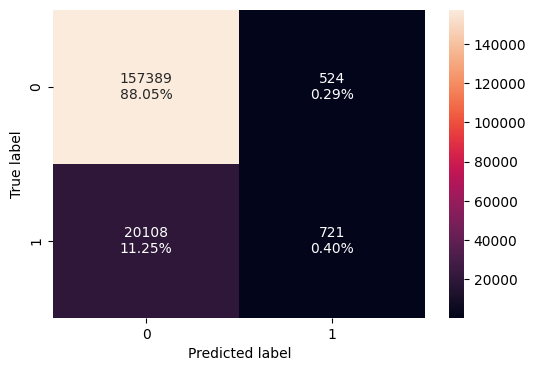

In [32]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [33]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.884571,0.034615,0.579116,0.065326


The f1_score of the model is ~0.89 and we will try to maximize it further

The variables used to build the model might contain multicollinearity, which will affect the p-values

We will have to remove multicollinearity from the data to get reliable coefficients and p-values

Additional information on the VIF

In [35]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                           66.650052
Age                              1.000048
Income                           1.000241
LoanAmount                       1.000082
CreditScore                      1.000118
MonthsEmployed                   1.000071
NumCreditLines                   1.000093
InterestRate                     1.000167
LoanTerm                         1.000093
DTIRatio                         1.000085
Education_High School            1.494285
Education_Master's               1.493515
Education_PhD                    1.492207
EmploymentType_Part-time         1.507080
EmploymentType_Self-employed     1.505266
EmploymentType_Unemployed        1.505858
MaritalStatus_Married            1.332969
MaritalStatus_Single             1.332987
HasMortgage_Yes                  1.000097
HasDependents_Yes                1.000091
LoanPurpose_Business             1.606579
LoanPurpose_Education            1.606005
LoanPurpose_Home                 1.607476

In [36]:

logit = sm.Logit(y_train, X_train.astype(float))
lg2 = logit.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.884571,0.034615,0.579116,0.065326


In [39]:
X_train1 = X_train.drop(["EmploymentType_Part-time", "EmploymentType_Unemployed"], axis=1,)

In [40]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               178742
Model:                          Logit   Df Residuals:                   178719
Method:                           MLE   Df Model:                           22
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                  0.1169
Time:                        10:47:39   Log-Likelihood:                -56818.
converged:                       True   LL-Null:                       -64339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.2126      0.061     -3.471      0.001      -0.333      -0.093
Age                             -0.0389      0.001    -70.600      0.000     

In [43]:
X_train2 = X_train1.drop(["HasDependents_Yes", "HasCoSigner_Yes"], axis=1)

In [44]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.319451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               178742
Model:                          Logit   Df Residuals:                   178721
Method:                           MLE   Df Model:                           20
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                  0.1125
Time:                        10:49:11   Log-Likelihood:                -57099.
converged:                       True   LL-Null:                       -64339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.4722      0.060     -7.849      0.000

In [45]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'DTIRatio', 'Education_High School', "Education_Master's", 'Education_PhD', 'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_Yes', 'LoanPurpose_Home']


In [46]:
# creating a new training set
X_train3 = X_train2[
    [
        "const",
        "Age",
        "Income",
        "LoanAmount",
        "CreditScore",
        "MonthsEmployed",
        "NumCreditLines",
        "InterestRate",
        "DTIRatio",
        "Education_High School",
        "Education_Master's",
        "Education_PhD",
        "MaritalStatus_Married",
        "MaritalStatus_Single",
        "HasMortgage_Yes",
        "LoanPurpose_Home"

    ]
].astype(float)

In [47]:
logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit(disp=False)
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               178742
Model:                          Logit   Df Residuals:                   178726
Method:                           MLE   Df Model:                           15
Date:                Tue, 16 Jul 2024   Pseudo R-squ.:                  0.1125
Time:                        10:54:39   Log-Likelihood:                -57102.
converged:                       True   LL-Null:                       -64339.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4853      0.056     -8.703      0.000      -0.595      -0.376
Age                      -0.0388      0.001    -70.465      0.000      -0.040      -0.038
Income  

Now no feature has p-value greater than 0.05, so we'll consider the features in X_train3 as the final ones and lg3 as final model.

The coefficient of interest rate and DTIRatio is positive, a decrease in that will lead to an increase in the rate of defaulters

In [49]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education_High School,Education_Master's,Education_PhD,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,LoanPurpose_Home
Odds,0.615531,0.961991,0.999991,1.000004,0.999231,0.990530,1.086130,1.071069,1.341622,1.087689,0.867900,0.844487,0.791700,0.940171,0.854519,0.798095
Change_odd%,-38.446895,-3.800909,-0.000869,0.000427,-0.076930,-0.946976,8.612977,7.106901,34.162190,8.768934,-13.210016,-15.551316,-20.829973,-5.982872,-14.548128,-20.190508


Age: Holding all other features constant a unit change in Age will decrease the odds of a customer being a defaulter by 0.96 times or a 3.80% decrease in odds.

CHECKING PERFORMANCE ON TRAINING SET

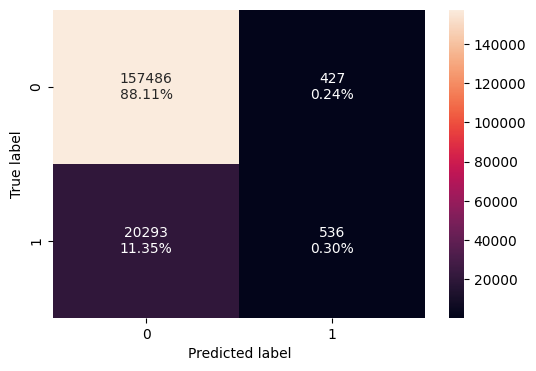

In [50]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [51]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.884079,0.025733,0.556594,0.049192


CHECKING PERFORMANCE ON THE TEST SET

In [61]:
X_test3 = X_test[X_train3.columns].astype(float)

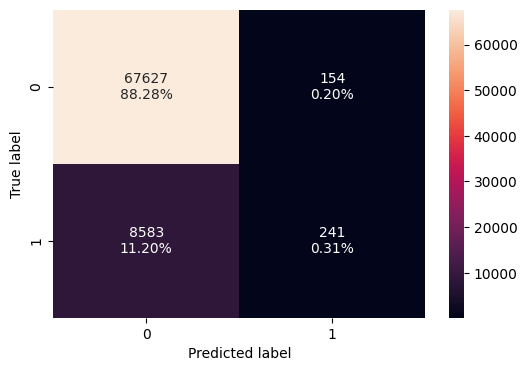

In [62]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [60]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.885947,0.027312,0.610127,0.052283


From our performance on both the train set and the test set our accuracy seem to be a good one.

OBSERVATION AND CONCLUSION

From our logistic regression model we identified that income is a significant predictor of a customer being a defaulter.

Bank should target more MaritalStatus_Married	 customers as they have lesser odds of defaulting.

Our analysis showed that younger customers are slightly more likely to default. The bank can alter its policies to deal with this.